# Práctica de RNN

## RNN en TENSORFLOW- INTRODUCCIÓN

In [18]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### 1. Simulación de datos: Función seno

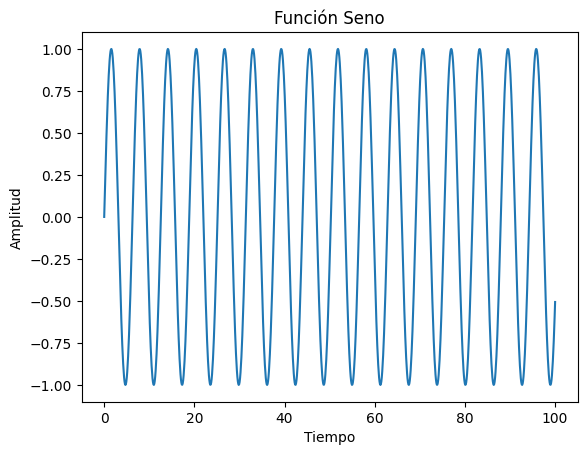

In [19]:
# Generación de datos
n_samples = 1000
x = np.linspace(0, 100, n_samples)
y = np.sin(x)

# Visualizamos la función seno
plt.plot(x, y)
plt.title('Función Seno')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.show()

## 2. Preprocesamiento de datos

In [20]:
# Escalamos los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

n_steps = 60  # Usamos 60 datos anteriores para predecir el siguiente

# División en conjunto de entrenamiento y prueba (80% - 20%)
train_size = int(len(y_scaled) * 0.8)
test_size = len(y_scaled) - train_size
train, test = y_scaled[:train_size], y_scaled[train_size:]

# Creación de secuencias para entrenamiento
def create_sequences(data, n_steps):
    x, y = [], []
    for i in range(n_steps, len(data)):
        x.append(data[i-n_steps:i, 0])  # Ventana de 60 pasos
        y.append(data[i, 0])  # El siguiente valor
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train, n_steps)
x_test, y_test = create_sequences(test, n_steps)

# Redimensionamos para que TensorFlow los acepte
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


## 3. Modelo con RNN Simple 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Modelo RNN simple
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
rnn_model.add(Dense(1))  # Capa de salida

# Compilamos el modelo
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
rnn_model.fit(x_train, y_train, epochs=20, batch_size=32)

# Predicciones sobre el conjunto de prueba
rnn_pred = rnn_model.predict(x_test)

# Desescalamos las predicciones para comparar con los datos reales
rnn_pred = scaler.inverse_transform(rnn_pred)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/20


/home/jupyter-user6/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3453
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1388e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.4571e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0361e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0398e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0912e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5724e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0866e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9422e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.8397e-05
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7602e-05
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.2987e-05
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8040e-05
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━

*Explicación de parámetros:*

** SimpleRNN(units=50):**

**1. units=50:** Define el número de neuronas (o unidades) en la capa RNN. Estas unidades procesan la secuencia de entrada y aprenden las dependencias temporales.. Más unidades permiten que la red capture más complejidad.
  
**2. input_shape=(x_train.shape[1], 1):** Este parámetro indica la forma de los datos de entrada. En este caso, tenemos una secuencia de tiempo de 10 pasos (n_steps=10), y para cada paso tenemos 1 característica (el valor seno en ese paso)

**3. return_sequences=False:** Se usa para indicar que solo queremos la salida final de la secuencia, no toda la secuencia intermedia.

**4. Dense(1):** La capa Dense es la más simple de todas las capas, y su función es tomar toda la información procesada hasta el momento y combinarla para producir una salida. Aquí agregamos una capa Dense con 1 neurona de salida. Eso significa que el modelo dará un solo número como resultado.

**5. optimizer='adam':** Un optimizador es un algoritmo que ajusta los pesos de la red neuronal para minimizar la "pérdida" (la diferencia entre lo que predice el modelo y lo que debería predecir).Un optimizador es un algoritmo que ajusta los pesos de la red neuronal para minimizar la "pérdida" (la diferencia entre lo que predice el modelo y lo que debería predecir).

**6. loss='mean_squared_error':** La función de pérdida mide la diferencia entre las predicciones y los valores reales utilizando el error cuadrático medio.

**7.Batches_size**  El modelo entrena en pequeños grupos de datos a la vez, en lugar de procesar todos los datos de una sola vez. Esto acelera el entrenamiento y estabiliza el proceso de aprendizaje

## 4. Modelo con LSTM

In [22]:
from tensorflow.keras.layers import LSTM

# Modelo LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(1))

# Compilamos el modelo
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
lstm_model.fit(x_train, y_train, epochs=20, batch_size=32)

# Predicciones sobre el conjunto de prueba
lstm_pred = lstm_model.predict(x_test)

# Desescalamos las predicciones
lstm_pred = scaler.inverse_transform(lstm_pred)


Epoch 1/20


/home/jupyter-user6/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2608
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0416
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0096
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.6419e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.0250e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.2584e-05
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.3901e-05
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.8286e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.4615e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1186e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.3908e-05
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.1912e-05
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.0558e-05
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7285e-05
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━

*Explicación de parámetros:* 
LSTM(units=50):

**units=50:** Define 50 neuronas de LSTM, que aprenden dependencias a largo plazo a través de la memoria de la red.

**Memoria en LSTM:** Las LSTM utilizan puertas para decidir qué información debe mantenerse o descartarse a lo largo de las secuencias.

**return_sequences=False:** Solo queremos la salida final de la secuencia, no cada paso intermedio.

**Dense(1):** Capa de salida con 1 neurona para predecir un único valor a partir de la secuencia.

**optimizer='adam'**  y **loss='mean_squared_error'**: Los mismos que en la RNN simple.

## 5. Modelo con GRU

In [23]:
from tensorflow.keras.layers import GRU

# Modelo GRU
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
gru_model.add(Dense(1))

# Compilamos el modelo
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamos el modelo
gru_model.fit(x_train, y_train, epochs=20, batch_size=32)

# Predicciones sobre el conjunto de prueba
gru_pred = gru_model.predict(x_test)

# Desescalamos las predicciones
gru_pred = scaler.inverse_transform(gru_pred)

Epoch 1/20


/home/jupyter-user6/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.2379
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0327
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0160
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0097
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0061
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0031
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.4415e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 3.2170e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.4950e-04
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.1341e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.7822e-04
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.3747e-04
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1.0287e-04
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.8702e-05
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/ste

*Explicación de parámetros:*

**GRU(units=50):**

**units=50:** Define 50 neuronas GRU, que son más ligeras en cuanto a recursos que las LSTM y se entrenan más rápido.

**return_sequences=False:** Igual que en los modelos anteriores, queremos la salida final.

**Dense(1):** Capa de salida que predice un solo valor de la secuencia.

**optimizer='adam'** 

**loss='mean_squared_error':** Se mantienen igual para todas las redes.

## 6. Visualización de resultados

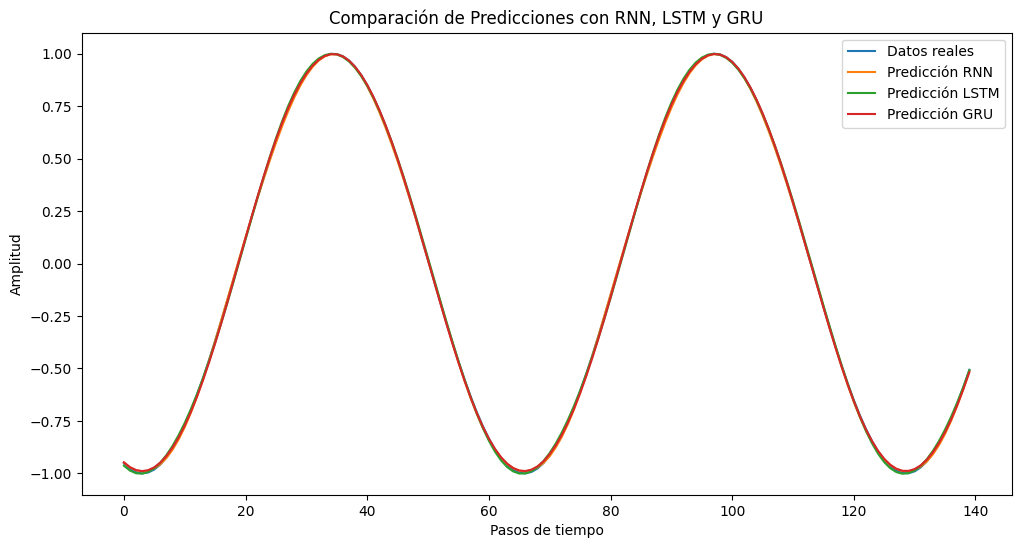

In [25]:
# Visualizamos los resultados
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_real)), y_test_real, label='Datos reales')
plt.plot(range(len(y_test_real)), rnn_pred, label='Predicción RNN')
plt.plot(range(len(y_test_real)), lstm_pred, label='Predicción LSTM')
plt.plot(range(len(y_test_real)), gru_pred, label='Predicción GRU')
plt.title('Comparación de Predicciones con RNN, LSTM y GRU')
plt.xlabel('Pasos de tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# NOMBRES DE DINOSAURIOS

In [48]:
# Lista de 100 dinosaurios
dinosaurios = [
    "Tyrannosaurus rex",
    "Velociraptor",
    "Triceratops",
    "Stegosaurus",
    "Brachiosaurus",
    "Ankylosaurus",
    "Spinosaurus",
    "Diplodocus",
    "Pteranodon",
    "Allosaurus",
    "Iguanodon",
    "Parasaurolophus",
    "Sauropelta",
    "Therizinosaurus",
    "Giganotosaurus",
    "Megalodon",
    "Oviraptor",
    "Carnotaurus",
    "Styracosaurus",
    "Pachycephalosaurus",
    "Microceratus",
    "Plesiosaurus",
    "Kentrosaurus",
    "Ceratosaurus",
    "Deinonychus",
    "Amphicoelias",
    "Apatosaurus",
    "Maiasaura",
    "Corythosaurus",
    "Saurophaganax",
    "Sinosauropteryx",
    "Edmontosaurus",
    "Ornithomimus",
    "Troodon",
    "Hadrosaurus",
    "Dreadnoughtus",
    "Argentinosaurus",
    "Gigantoraptor",
    "Baryonyx",
    "Suchomimus",
    "Theropoda",
    "Hesperornis",
    "Hypsilophodon",
    "Scutellosaurus",
    "Nodosaurus",
    "Therizinosaur",
    "Protoceratops",
    "Masiakasaurus",
    "Carcharodontosaurus",
    "Coelophysis",
    "Irritator",
    "Ankylosaurus",
    "Gryposaurus",
    "Alamosaurus",
    "Dromaeosaurus",
    "Ornitholestes",
    "Therizinosaurus",
    "Pachyrhinosaurus",
    "Rhabdodon",
    "Choyrodon",
    "Eotrachodon",
    "Astrodon",
    "Monolophosaurus",
    "Theropoda",
    "Scelidosaurus",
    "Diclonius",
    "Alectrosaurus",
    "Rexroadia",
    "Lourinhanosaurus",
    "Notohyus",
    "Cionodon",
    "Hypsilophodon",
    "Elaphrosaurus",
    "Choyrodon",
    "Orodromeus",
    "Maiasaura",
    "Gryposaurus",
    "Shunosaurus",
    "Eotrachodon",
    "Hippodraco",
    "Matheronodon",
    "Rhabdodon",
    "Saurornithoides",
    "Zhanghenglong",
    "Eotrachodon",
    "Saurornitholestes",
    "Fukuiraptor",
    "Matheronodon",
    "Shunosaurus",
    "Pachycephalosaurus",
    "Sinraptor",
    "Eotrachodon",
    "Fukuiraptor",
    "Zhenyuanlong",
    "Wuerhosaurus",
    "Rhabdodon",
    "Shantungosaurus",
    "Lanzhousaurus",
    "Eoraptor",
    "Xiongguanlong"
]

# Crear un DataFrame
dinosaurios = pd.DataFrame(dinosaurios, columns=['Dinosaurios'])

# Mostrar el DataFrame
dinosaurios



,Dinosaurios
0,Tyrannosaurus rex
1,Velociraptor
2,Triceratops
3,Stegosaurus
4,Brachiosaurus
...,...
95,Rhabdodon
96,Shantungosaurus
97,Lanzhousaurus
98,Eoraptor


In [1]:
dinosaurios = [

    "Lupita", "Johanna", "Kristoff", "Carlos", "Ana", "Luis", "María", "José", "Carmen", "Juan",

    "Sofía", "Pedro", "Lucía", "Javier", "Isabel", "Diego", "Clara", "Andrés", "Patricia", "David",

    "Verónica", "Miguel", "Raquel", "Francisco", "Monica", "Adriana", "Fernando", "Gabriela", "Rafael",

    "Cristina", "Jorge", "Nadia", "Ricardo", "Estefanía", "Marco", "Vanessa", "Pablo", "Gloria", "Sebastián",

    "Carla", "Antonio", "Tamara", "Alejandro", "Susana", "Fernando", "Marisol", "Emilio", "Lidia",

    "Natalia", "Elias", "Patricio", "Martín", "Luciana", "Alberto", "Teresa", "Hugo", "Bárbara", "Salvador",

    "Cecilia", "Claudia", "Octavio", "Raúl", "Elena", "Iván", "Lourdes", "Felipe", "Marina", "Vicente",

    "Karla", "Jonathan", "Angela", "Rosa", "César", "Olga", "Simón", "Fabiola", "Alejandra", "Sergio",

    "Maite", "Marcelino", "Bianca", "Ricardo", "Nicolás", "Catalina", "Gonzalo", "Esteban", "Adela", "Victor",

    "Lia", "Fernando", "Diana", "Joaquín", "Alicia", "Adolfo", "Daniela", "Guadalupe", "Omar", "Priscila",

    "Félix", "Yolanda", "Santiago", "Estela", "Ezequiel", "Ruth", "Valentina", "Diego", "Nora", "Patricio",

    "Guillermo", "Silvia", "Carmen", "Pilar", "Roberto", "Zulema", "Maximiliano", "Liana", "Leonardo", "Emilia",

    "Alba", "Samuel", "Celia", "Ernesto", "Mariana", "Ricardo", "Aurelio", "Irene", "Alejandro", "Cristian",

    "Benjamín", "Martha", "Patricia", "Agustín", "Ivette", "Salomón", "Miranda", "Rogelio", "Laura", "Sabrina",

    "Alfredo", "Teresa", "Graciela", "Julio", "Rita", "César", "Oscar", "María José", "Hilda", "Justina",

    "Aitana", "Bruno", "Carmen", "Inés", "Horacio", "Hilda", "Maximiliano", "Felipe", "Mónica", "Susana",

    "Rosario", "Elisabeth", "Dulce", "René", "Estefanía", "Sonia", "Nicolás", "Alma", "Rodrigo", "Rebeca",

    "Juliana", "Cynthia", "Rosario", "Hernán", "Viviana", "Julieta", "Fabián", "Concepción", "Simón", "Beatriz",

    "Valeria", "Germán", "Nadia", "Francisco", "Marisol", "Yazmín", "Nicolás", "Patricia", "Rubén", "María Fernanda",

    "Iñigo", "Guadalupe", "Julio", "María Elena", "Alejandra", "María de los Ángeles", "Nicolás", "Silvana", "Tatiana", "Luciana",

    "Rocío", "Diego", "Guillermina", "Diana", "José Manuel", "Erica", "Julián", "Ernestina", "Patricia", "Angélica",

    "José Luis", "Margarita", "Enrique", "Mariana", "Omar", "Gonzalo", "Rafael", "Selena", "Esteban", "Josué",

    "Amparo", "Vicente", "Ivette", "José Carlos", "Rocío", "Luis Alberto", "Juan Carlos", "Marisol", "Jazmín", "Benita",

    "Manuel", "José Luis", "David", "Alma", "Bernardo", "Guadalupe", "Joaquín", "Lucero", "Sergio", "Lourdes",

    "Rafael", "Luis Fernando", "Samuel", "Fanny", "Patricio", "Anastasia", "Alfredo", "Mauricio", "Hugo", "Cynthia",

    "Joaquín", "Oscar", "Gabriel", "Jaime", "Gonzalo", "Efrén", "Mauricio", "Miranda", "Alfonso", "Flor",

    "Yasmin", "Paloma", "Valentín", "Álvaro", "Lía", "Arianna", "Brenda", "Salvador", "Ismael", "Gustavo",

    "Jaime", "Ricardo", "Gerardo", "Claudia", "Leonel", "Marisa", "Cristhian", "Héctor", "Marco Antonio", "Adriana",

    "Gilda", "Leonardo", "Miriam", "Diego", "Rubén", "Rodolfo", "Mariana", "Yolanda", "Ezequiel", "Julieta",

    "Iván", "René", "Esteban", "Lucrecia", "Claudio", "Isabella", "Nina", "Renato", "María del Carmen", "Adelaida",

    "Salomón", "Nora", "Raúl", "Miguel", "Eloisa", "Alba", "Federico", "Mariana", "José Alfredo", "Concepción",

    "Martha", "Raquel", "Sandra", "Matías", "María Teresa", "Arturo", "Francisco Javier", "Margarita", "Carlos Alberto",

    "Araceli", "Ramiro", "Alberto", "Erika", "Marisol", "Iván", "Cecilia", "Lía", "Carlos Eduardo", "Ángel",

    "Mauricio", "Fernando", "Karla", "Anita", "Rafael", "Cristian", "Félix", "Rocío", "Omar", "Anahí",

    "Diego", "Araceli", "Jorge Luis", "Mireya", "Santiago", "Arturo", "Daniel", "Carmen", "Santiago", "Roxana",

    "Alfredo", "Patricia", "María del Pilar", "Tania", "Olga", "Nicolás", "Isabel", "Ricardo", "Simón", "Javier",

    "Gina", "Cristian", "Juan Pablo", "Joaquín", "Fernando", "Valeria", "Gabriel", "Leonardo", "Cristina", "Cristóbal",

    "Ángela", "Alba", "Luis", "Roberto", "Evelyn", "Julio", "Esteban", "Antonio", "Nicolás", "Rafael",

    "Gilda", "Julieta", "Renato", "Gabriela", "María Gabriela", "Martha", "Diego", "Leonor", "Pablo", "Gloria",

    "Joaquín", "Emilio", "Zoe", "Fernando", "Estefanía", "Alondra", "Gerardo", "Luis Fernando", "Ernesto", "José Antonio",

    "Ángel", "Alejandra", "Natalia", "Tomas", "María de los Ángeles", "Carlos Alberto", "María", "Roberto", "Jorge", "Marisol",

]
print(dinosaurios)


['Lupita', 'Johanna', 'Kristoff', 'Carlos', 'Ana', 'Luis', 'María', 'José', 'Carmen', 'Juan', 'Sofía', 'Pedro', 'Lucía', 'Javier', 'Isabel', 'Diego', 'Clara', 'Andrés', 'Patricia', 'David', 'Verónica', 'Miguel', 'Raquel', 'Francisco', 'Monica', 'Adriana', 'Fernando', 'Gabriela', 'Rafael', 'Cristina', 'Jorge', 'Nadia', 'Ricardo', 'Estefanía', 'Marco', 'Vanessa', 'Pablo', 'Gloria', 'Sebastián', 'Carla', 'Antonio', 'Tamara', 'Alejandro', 'Susana', 'Fernando', 'Marisol', 'Emilio', 'Lidia', 'Natalia', 'Elias', 'Patricio', 'Martín', 'Luciana', 'Alberto', 'Teresa', 'Hugo', 'Bárbara', 'Salvador', 'Cecilia', 'Claudia', 'Octavio', 'Raúl', 'Elena', 'Iván', 'Lourdes', 'Felipe', 'Marina', 'Vicente', 'Karla', 'Jonathan', 'Angela', 'Rosa', 'César', 'Olga', 'Simón', 'Fabiola', 'Alejandra', 'Sergio', 'Maite', 'Marcelino', 'Bianca', 'Ricardo', 'Nicolás', 'Catalina', 'Gonzalo', 'Esteban', 'Adela', 'Victor', 'Lia', 'Fernando', 'Diana', 'Joaquín', 'Alicia', 'Adolfo', 'Daniela', 'Guadalupe', 'Omar', 'Prisci

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import random

2024-10-25 01:07:55.409821: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-25 01:07:55.422031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 01:07:55.435647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 01:07:55.439373: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-25 01:07:55.448837: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# 1. Preparar los datos

# 2. Preprocesar los datos
# Convertir nombres a texto
text = ' '.join(dinosaurios)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts([text])

# Crear secuencias
total_chars = len(tokenizer.word_index) + 1
input_sequences = []
for name in dinosaurios:
    encoded = tokenizer.texts_to_sequences([name])[0]
    for i in range(1, len(encoded)):
        input_sequences.append(encoded[:i + 1])

In [5]:
# Pad sequences
max_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')

In [6]:
# Separar características y etiquetas
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_chars)

In [7]:
# 3. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 4. Construir el modelo RNN
model = Sequential()
model.add(Embedding(total_chars, 50, input_length=max_length - 1))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(total_chars, activation='softmax'))

/home/jupyter-user6/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-10-25 01:08:15.338656: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# 5. Compilar y entrenar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_test, y_test))

Epoch 1/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.1396 - loss: 3.1942 - val_accuracy: 0.1928 - val_loss: 2.8269
Epoch 2/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1673 - loss: 2.8454 - val_accuracy: 0.1928 - val_loss: 2.8102
Epoch 3/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1687 - loss: 2.8370 - val_accuracy: 0.1928 - val_loss: 2.8019
Epoch 4/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1890 - loss: 2.7793 - val_accuracy: 0.1928 - val_loss: 2.7830
Epoch 5/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1900 - loss: 2.7440 - val_accuracy: 0.2500 - val_loss: 2.6422
Epoch 6/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2486 - loss: 2.5820 - val_accuracy: 0.2691 - val_loss: 2.4853
Epoch 7/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2491 - loss: 2.4729 - val_accuracy: 0.2754 - val_loss: 2.4327
Epoch 8/200
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2790 - loss: 2.4141 - val_accuracy: 0.

In [10]:
# 6. Generar nombres de dinosaurios
def generate_dinosaur_name(seed, n_chars):
    for _ in range(n_chars):
        encoded = tokenizer.texts_to_sequences([seed])[0]
        encoded = pad_sequences([encoded], maxlen=max_length - 1, padding='pre')
        predicted = model.predict(encoded, verbose=0)
        next_char = np.argmax(predicted)
        seed += tokenizer.index_word[next_char]
    return seed

In [15]:
# Generar nuevos nombres
for _ in range(100):
    start = random.choice(dinosaurios)
    print(generate_dinosaur_name(start, 3))  # Generar 3 caracteres adicionales

Robertordo
Arturosos
Raúlos 
Rebecanto
Cristianand
Isabeland
Ángelacur
Sabrinanda
Biancardo
María de
Silvanader
Estebanían
Iñigolfe
Adelaidadel
Ricardos e
Silvianda
Emilionor
Iñigolfe
Priscilanda
Raqueland
Ivándel
Kristoffelo
Guadaluperno
Simónand
María de
Césartos
Joaquínand
Justinanda
Isabeland
Vivianacue
Lianardo
Mauricionon
María Joséana
Danieland
Cynthianos
Nicolás el
Hugolto
Karlanda
Héctordos
Rodolfonda
Salomónand
Maximilianonos
Sebastiánand
Emilionor
Santiagosan
Valeriando
Marco Antonionan
Cristinanda
Aliciando
Rocíonan
Yolandalos
Rocíonan
Luis Fernandosfe
Almarac
Sandranda
Roxanalbe
María Joséana
Ángelacur
Raqueland
Agustínand
Marisolosd
Celianan
Fabiolanda
Isabeland
Nicolás el
Raúlos 
Leonardosé 
Javiernan
Joaquínand
Carmenand
Guadaluperno
Albarto
Angélicanda
Zulemandr
Vivianacue
Mauricionon
Lourdescol
Dianacie
Diegolfo
Marisalos
Gerardos a
Leonardosé 
Diegolfo
Maximilianonos
José al
Almarac
Olgarac
Martínand
Angelanda
Alejandrador
Sergionan
Santiagosan
Carmenand
Vicenteban
B